# Random Walk with Restarts and Personalized PageRank 

## PageRank and Recommendations
![](figures/04-pagerank_40.jpeg)
![](figures/04-pagerank_41.jpeg)
![](figures/04-pagerank_42.jpeg)
![](figures/04-pagerank_44.jpeg)
![](figures/04-pagerank_45.jpeg)

## Proximity on Graphs
![](figures/04-pagerank_46.jpeg)

### Implementation
In practice, one can modify the teleport vector to implement a personalized Pagerank. For large graphs, an iteration method is preferred.

In [25]:
import networkx as nx
import numpy as np

def google_matrix(G, beta=0.85, personalization=None):
    """
    Parameters
    ----------
    G: graph
    beta: the damping factor
    personalization: dict, the personalization vectors of each node
    """
    M = nx.to_numpy_matrix(G)
    N = len(G)
    M = nx.to_numpy_matrix(G)
    M = M / M.sum(axis=1)
    if personalization is None:
        p = 1. / N * np.ones(shape=(N, N))
    else:
        p = np.array([personalization.get(n, 0) for n in G.nodes], dtype=float)
        p /= p.sum()
    
    return beta * M + (1 - beta) * p

def page_rank(G, beta=0.85, personalization=None):
    M = google_matrix(G, beta, personalization)
    eignevalues, eigenvectors = np.linalg.eig(M.T)
    idx_max_eigval = np.argmax(eignevalues)
    max_eigvec = np.array(eigenvectors[:,idx_max_eigval]).flatten().real
    return list(zip(G.nodes, max_eigvec / max_eigvec.sum()))

In [26]:
G = nx.Graph()
customer = ["John", "Mary", "Jill", "Todd"]
product = ["iPhone5", "Kindle Fire", "Fitbit Flex Wireless", "Harry Potter", "Hobbit"]

G.add_nodes_from(customer + product)
G.add_edges_from([
    ("John", "iPhone5"),
    ("John", "Kindle Fire"),
    ("Mary", "iPhone5"),
    ("Mary", "Kindle Fire"),
    ("Mary", "Fitbit Flex Wireless"),
    ("Jill", "iPhone5"),
    ("Jill", "Kindle Fire"),
    ("Jill", "Fitbit Flex Wireless"),
    ("Todd", "Fitbit Flex Wireless"),
    ("Todd", "Harry Potter"),
    ("Todd", "Hobbit"),
])

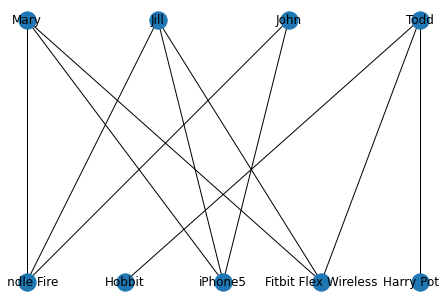

In [27]:
nx.draw(G, pos=nx.bipartite_layout(G, nodes=customer, align='horizontal'),  with_labels=True)

In [30]:
page_rank(G, personalization = {'John': 1, 'Jill': 1})

[('John', 0.1657758884700749),
 ('Mary', 0.12086116192795418),
 ('Jill', 0.195861161927954),
 ('Todd', 0.05804232821455758),
 ('iPhone5', 0.1601927443589557),
 ('Kindle Fire', 0.16019274435895575),
 ('Fitbit Flex Wireless', 0.10618331808663194),
 ('Harry Potter', 0.016445326327457953),
 ('Hobbit', 0.016445326327457953)]

## Random Walks with Restarts
![](figures/04-pagerank_47.jpeg)
![](figures/04-pagerank_48.jpeg)
![](figures/04-pagerank_49.jpeg)
![](figures/04-pagerank_50.jpeg)
![](figures/04-pagerank_51.jpeg)
## PageRank Variants
![](figures/04-pagerank_52.jpeg)
![](figures/04-pagerank_53.jpeg)